# 네이버 데이터 랩 https://datalab.naver.com/
20221014-

- 회사명 관련 검색량 데이터 크롤링
- 검색량이 0이상인것 만 뽑힘
- https://foss4g.tistory.com/1410
- https://developers.naver.com/docs/serviceapi/datalab/search/search.md#python

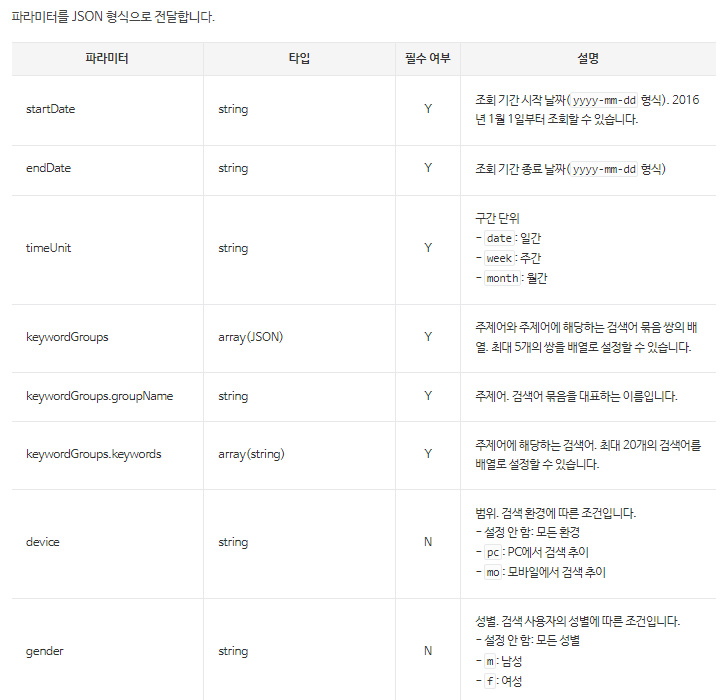

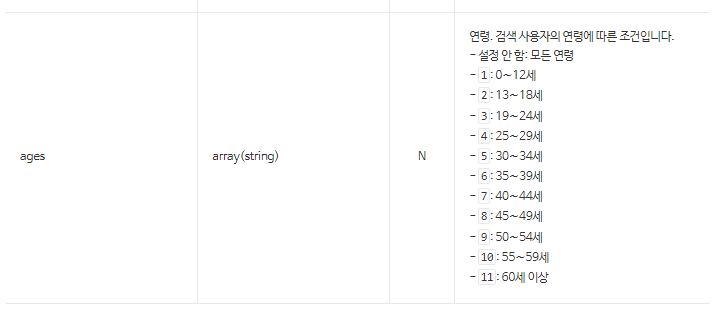

In [1]:
import urllib.request
import json
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#400 error 요청변수 확인

In [144]:
#-*- coding: utf-8 -*-
import os
import sys
import urllib.request

client_id = "_fhVEKEqjPXpFnAqhvEv"
client_secret = "MwcgpgH7E9"
url = "https://openapi.naver.com/v1/datalab/search";

body = {
"startDate":"2018-01-01"
    ,"endDate":"2021-12-31",
    "timeUnit":"date",
        "keywordGroups":[
            {"groupName":"한일가스산업","keywords":["한일가스산업"]},
        ],
            }
#body = "{\"startDate\":\"2018-01-01\",\"endDate\":\"2021-12-31\",\"timeUnit\":\"date\",\"keywordGroups\":[{\"groupName\":\"엠피아이\",\"keywords\":\"엠파이어\"}]}";

body=json.dumps(body)
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()
json_obj= json.loads(response.read().decode('utf-8'))

if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)
json_obj

{'startDate': '2018-01-01',
 'endDate': '2021-12-31',
 'timeUnit': 'date',
 'results': [{'title': '한일가스산업',
   'keywords': ['한일가스산업'],
   'data': [{'period': '2018-01-16', 'ratio': 25},
    {'period': '2018-01-19', 'ratio': 25},
    {'period': '2018-02-08', 'ratio': 25},
    {'period': '2018-04-03', 'ratio': 30},
    {'period': '2018-05-10', 'ratio': 30},
    {'period': '2018-07-24', 'ratio': 25},
    {'period': '2018-09-14', 'ratio': 25},
    {'period': '2018-10-23', 'ratio': 35},
    {'period': '2019-01-16', 'ratio': 30},
    {'period': '2019-01-18', 'ratio': 25},
    {'period': '2019-03-19', 'ratio': 25},
    {'period': '2019-04-02', 'ratio': 25},
    {'period': '2019-04-08', 'ratio': 30},
    {'period': '2019-05-15', 'ratio': 25},
    {'period': '2019-10-15', 'ratio': 25},
    {'period': '2019-11-15', 'ratio': 50},
    {'period': '2019-11-16', 'ratio': 30},
    {'period': '2020-01-02', 'ratio': 40},
    {'period': '2020-01-14', 'ratio': 40},
    {'period': '2020-03-03', 'ratio': 10

In [148]:
#데이터 프레임 변경
df1=pd.DataFrame(json_obj['results'][0]['data']);df1.columns=['period',str('keywords')]

df1['period']=df1['period'].astype(str) #속성 object로 통일하기
df1

,period,keywords
0,2018-01-16,25
1,2018-01-19,25
2,2018-02-08,25
3,2018-04-03,30
4,2018-05-10,30
5,2018-07-24,25
6,2018-09-14,25
7,2018-10-23,35
8,2019-01-16,30
9,2019-01-18,25


In [28]:
# datetime 2018/1/1~2021/12/31 칼럼 만들고 빈값 0으로 채우기

In [56]:
dates = pd.date_range('2018-01-01','2021-12-31',freq='1d')
dates


DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=1461, freq='D')

In [67]:
dates_df=dates.to_frame(index=False, name='period')
dates_df['period']=dates_df['period'].astype(str)#속성 object로 통일하기
type(dates_df)
dates_df

,period
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
...,...
1456,2021-12-27
1457,2021-12-28
1458,2021-12-29
1459,2021-12-30


In [68]:
new_df=pd.merge(dates_df,df1,how='left',on='period')

In [69]:
new_df.shape

(1461, 2)

In [70]:
new_df.head()

,period,keywords
0,2018-01-01,NaN
1,2018-01-02,NaN
2,2018-01-03,NaN
3,2018-01-04,NaN
4,2018-01-05,NaN


- 반복문 활용 1000개 기업에 대한 검색량가져오기

In [77]:
import pandas as pd
close_dt = pd.read_excel("C:/Users/shcho/Desktop/윤영/sesac/공모전/numble/data/휴폐업 중소법인 재무보유.xlsx",sheet_name = '기업개요')
close_dt['CMP_NM'] =close_dt['CMP_NM'].astype(str) # 문자열로 변환
#close_dt['close']='Y'
close_name=close_dt['CMP_NM'].values.tolist()

print(len(close_dt['BIZ_NO']))#전체 휴폐업 기업수
print(close_name)

6739
['용진테크', '신구건설', '석정미디어', '새한실업', '석영엔터프라이즈', '남경엔지니어링토건', '유일철강', '한일물산(주)서울직매장', '그렉스전자', '신한스틸', '근유', '하랑그룹', '아이티스타', '협진기계', '아이세로미림화학', '케이원목재', '호연토건', '경성섬유', '금강특수', '유진해운', '유레카', '로젠솔루션', '세주상사', '연우기술', '현대특수나염', '삼양기전', '세아웰텍', '바우정보기술', '동양전기산업', '성도', '다함넷', '푸른영도', '제일산업', '한창산업', '대유철강', '스피드넷', '타워정밀', '에스마크', '한국건드릴', '이앤비코리아', '삼인실업', '상현종합조경', '대왕제지', '케이브랜즈', '카바스', '모투스', '에이치에이티', '도헌', '쓰리윈이알피', '대성어패럴', '정석건업', '대성지류유통', '에이스지앤월드', '청호에스엔지호남', '밀로텍', '동성특수종합물류', '플랙트그룹코리아', '한양철강', '신기정공', '돈우', '데오테크', '돌담', '드올', '우진건설', '에스엠에너지', '뜨레비디엔씨', '예강산업', '케이디엠텍', '문성엘에스', '해날건설', '마이크로에스엔브이콘트롤', '우림문화사', '다이엑스', '우림종합건설', '오선물산', '후이즈홀딩스', '협우설비', '소복건설', '풍양상사', '대건개발', '동양유통', '한국증권정보기술', '청산종합건설', '가미', '엑심코퍼레이션', '한륙전자', '상훈종합건영', '지엔에스엠엔씨', '후림개발', '바오텍', '이아이에스', '지원건설', '마무트코리아', '에스티에이치건설', '한신인더스트리', '시너지미디어', '보형', '영광전기', '위림종합건설', '제일벽지', '에이치디종합건설', '신한기술센타', '나라손', '티스톤', '매크론', '베스트샵수영', '플러스씨엔에스', '경보제지', '삼오물류정보', '이츠웰', '한국콘탭시스템', '멀린엔터테인먼트

- for문 돌면서 데이터 쌓기
- 기업별 검색량 데이터 프레임 하나씩 받아옴(period,검색량)
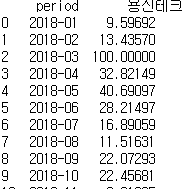

- 빈 데이터의 경우 미리 만들어 준 연-월 날짜 데이터(dates_df)을 기준으로 merge

- period빈 데이터 예 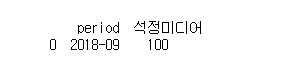

- append로 검색량값 데이터만 뽑아서 concat
- 각각 append->concat 시키면서 열기준 (axis=1)붙이기 
- 마지막에 날짜데이터(dates_df)랑 concat

In [161]:
#반복문 활용 전체코드
import json
import pandas as pd
import matplotlib.pyplot as plt
#-*- coding: utf-8 -*-
import os
import sys
import urllib.request


#최대 4년 간 연간날짜 칼럼만들기(%Y-%m)

dates = pd.period_range('2018-01','2021-12',freq='M')
dates_df=dates.to_frame(index=False, name='period')
dates_df['period']=dates_df['period'].astype(str)#속성 object로 통일하기


#월별 검색량 데이터 가져오기

client_id = "_fhVEKEqjPXpFnAqhvEv"
client_secret = "MwcgpgH7E9"
url = "https://openapi.naver.com/v1/datalab/search";

#검색량 값을 받기위한 빈리스트
new_df=[] 


for i in close_name[:5]:
    
    body = {
    "startDate":"2018-01-01"
        ,"endDate":"2021-12-31",
        "timeUnit":"month",
            "keywordGroups":[
                {"groupName":str(i),"keywords":[str(i)]},
            ],
                }
    
    body=json.dumps(body)
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    request.add_header("Content-Type","application/json")
    response = urllib.request.urlopen(request, data=body.encode("utf-8"))
    rescode = response.getcode()
    json_obj= json.loads(response.read().decode('utf-8'))

    if(rescode==200):
        response_body = response.read()
        print(response_body.decode('utf-8'))
    else:
        print("Error Code:" + rescode)
    #json_obj
    
    #list로 옆으로 쌓기
    



    #'석정미디어'의 경우 json으로 추출시 2018-09 데이터 하나만 추출됨.
    # #데이터 프레임 데이터 받아 온 루 period기준으로 merge 
    
    df1=pd.DataFrame(json_obj['results'][0]['data'])
    df1.columns=['period',str('keywords')]
    df1['period']=pd.to_datetime(df1['period'], format='%Y-%m-%d')
    df1['period']=df1['period'].dt.strftime('%Y-%m')
    df1['period']=df1['period'].astype(str) #속성 object로 통일하기
    df1.rename(columns = {'keywords':str(i)},inplace=True) #기업명으로 칼럼명 변경
    temp_dt=pd.merge(dates_df,df1,how='left',on='period')
    
    # 검색량 데이터만 뽑아서 concat하기위해 값만 append
    new_df.append(temp_dt.iloc[:,1])
    
    #print(new_df)

# 각각 append->concat 시키면서 열기준 (axis=1)붙이기 
search_dt=pd.concat(new_df,axis=1)
search_dt


# 마지막에 날짜데이터(dates_df)랑 concat



     period       용진테크
0   2018-01    9.59692
1   2018-02   13.43570
2   2018-03  100.00000
3   2018-04   32.82149
4   2018-05   40.69097
5   2018-06   28.21497
6   2018-07   16.89059
7   2018-08   11.51631
8   2018-09   22.07293
9   2018-10   22.45681
10  2018-11    9.21305
11  2018-12   21.30518
12  2019-01   24.18426
13  2019-02   13.62763
14  2019-03   25.71976
15  2019-04   27.25527
16  2019-05   17.27447
17  2019-06    9.02111
18  2019-07   14.01151
19  2019-08   16.31477
20  2019-09    8.63723
21  2019-10   22.26487
22  2019-11   14.58733
23  2019-12   16.50671
24  2020-01    9.59692
25  2020-02   14.01151
26  2020-03   12.85988
27  2020-04    7.67754
28  2020-05   10.74856
29  2020-06   23.22456
30  2020-07   14.97120
31  2020-08   18.04222
32  2020-09   15.54702
33  2020-10   12.85988
34  2020-11   33.58925
35  2020-12   24.37619
36  2021-01   39.73128
37  2021-02   17.08253
38  2021-03   27.44721
39  2021-04   18.04222
40  2021-05   14.01151
41  2021-06   22.07293
42  2021-0

,용진테크,신구건설,석정미디어,새한실업,석영엔터프라이즈
0,9.59692,100.00000,NaN,NaN,100.00000
1,13.43570,54.02476,NaN,NaN,48.14814
2,100.00000,71.59442,NaN,NaN,48.67724
3,32.82149,96.82662,NaN,92.30769,47.08994
4,40.69097,96.51702,NaN,38.46153,31.74603
5,28.21497,45.58823,NaN,76.92307,39.15343
6,16.89059,52.01238,NaN,NaN,49.20634
7,11.51631,53.01857,NaN,NaN,59.78835
8,22.07293,40.32507,100.0,NaN,43.91534
9,22.45681,35.99071,NaN,NaN,47.08994


In [ ]:
    
    date = [a['period'] for a in json_obj[['results'][0]['data']]

    ratio = [a[['ratio'] for a in json_obj[['results'][0]['data']]

    pd.DataFrame({'date':date, 
                  'cold':cold_ratio,
                  'flu':flu_ratio,
                  'pneumonia':pneumonia_ratio,
                  'coronavirus':coronavirus_ratio})
    df1.columns=['period',str('keywords')]

In [88]:
    #최대 4년 간 연간날짜 칼럼만들기
    dates = pd.period_range('2018-01','2021-12',freq='M')
    dates_df=dates.to_frame(index=False, name='period')
    dates_df['period']=dates_df['period'].astype(str)#속성 object로 통일하기

In [99]:
 dates_df

,period
0,2018-01
1,2018-02
2,2018-03
3,2018-04
4,2018-05
5,2018-06
6,2018-07
7,2018-08
8,2018-09
9,2018-10
